<a href="https://colab.research.google.com/github/Vanisha2005/SCT_DS_1/blob/main/SCT_DS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving API_SP.POP.TOTL_DS2_en_csv_v2_5830 (1).zip to API_SP.POP.TOTL_DS2_en_csv_v2_5830 (1).zip


In [2]:
import zipfile
import os

zip_path = "/content/API_SP.POP.TOTL_DS2_en_csv_v2_5830 (1).zip"
extract_path = "/content/pop_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))



Extracted files: ['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_5830.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5830.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_5830.csv']


In [3]:
import pandas as pd

# Check the actual filename inside the folder
file_name = "API_SP.POP.TOTL_DS2_en_csv_v2_5830.csv"  # Update if different
df = pd.read_csv(os.path.join(extract_path, file_name), skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [4]:
india_df = df[df['Country Name'] == 'India']
india_df = india_df.loc[:, '1960':'2022'].T
india_df = india_df.reset_index()
india_df.columns = ['Year', 'Population']
india_df['Year'] = india_df['Year'].astype(int)
india_df['Population'] = india_df['Population'].astype(float)
india_df.tail()


,Year,Population
58,2018,1.374659e+09
59,2019,1.389030e+09
60,2020,1.402618e+09
61,2021,1.414204e+09
62,2022,1.425423e+09


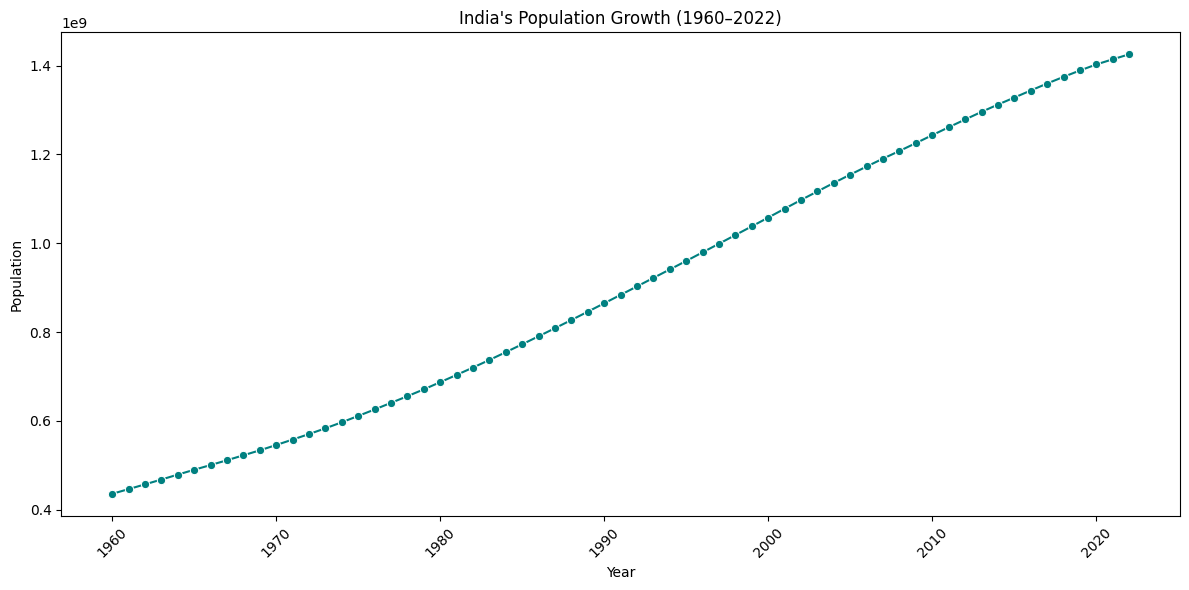

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=india_df, x='Year', y='Population', marker='o', color='teal')
plt.title("India's Population Growth (1960–2022)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


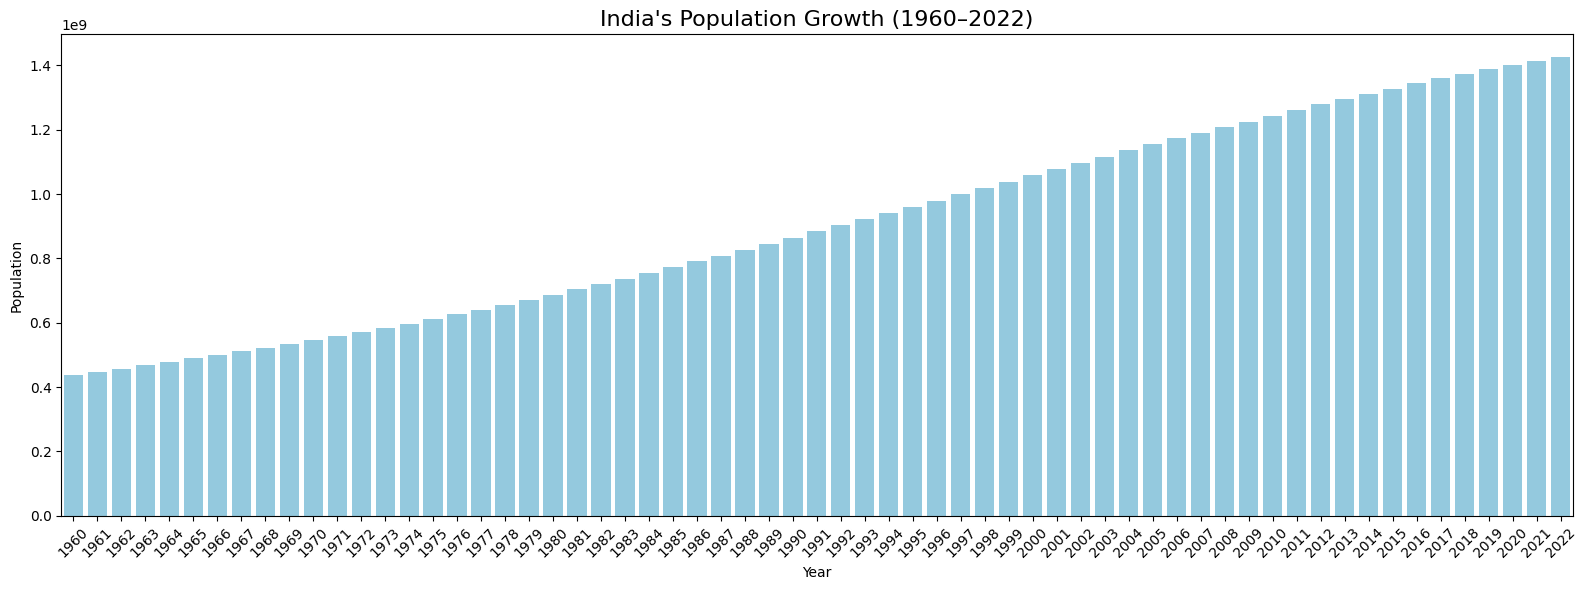

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.barplot(data=india_df, x='Year', y='Population', color='skyblue')

plt.title("India's Population Growth (1960–2022)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Using official World Bank data, we visualized India's population growth from 1960 to 2022.
This bar chart shows a steady rise, with India's population surpassing 1.4 billion in recent years.
This bar chart demonstrates demographic expansion and highlights the importance of sustainable development.

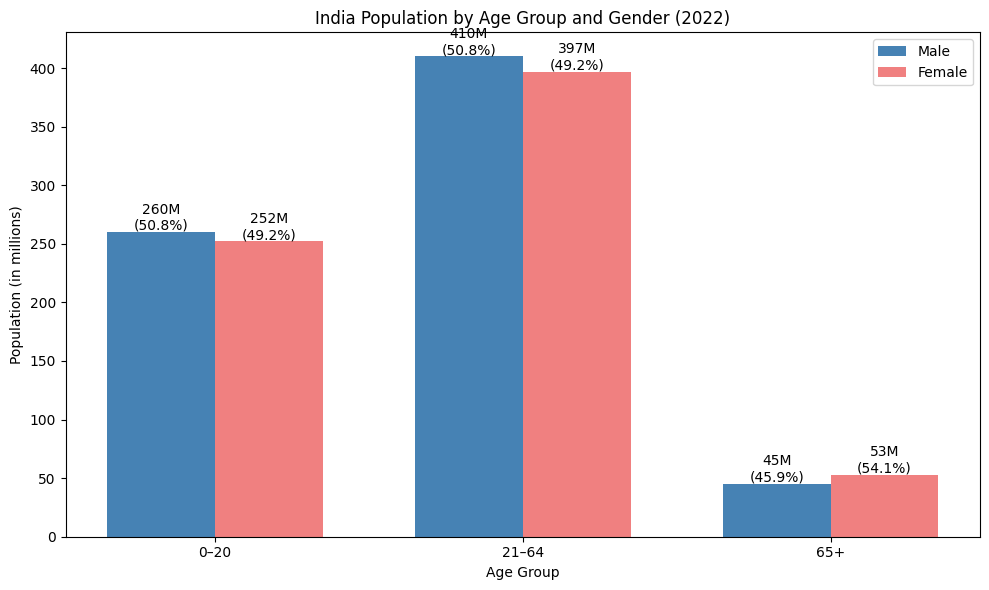

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample gender-based population data for India (2022)
data = {
    'Age Group': ['0–20', '21–64', '65+'],
    'Male': [260, 410, 45],
    'Female': [252, 397, 53]
}

df_gender = pd.DataFrame(data)

# Total population for each group
df_gender['Total'] = df_gender['Male'] + df_gender['Female']

# Percentage columns
df_gender['Male %'] = round((df_gender['Male'] / df_gender['Total']) * 100, 1)
df_gender['Female %'] = round((df_gender['Female'] / df_gender['Total']) * 100, 1)

# Bar chart
bar_width = 0.35
x = np.arange(len(df_gender['Age Group']))

plt.figure(figsize=(10,6))
bars1 = plt.bar(x - bar_width/2, df_gender['Male'], width=bar_width, label='Male', color='steelblue')
bars2 = plt.bar(x + bar_width/2, df_gender['Female'], width=bar_width, label='Female', color='lightcoral')

# Labels on bars
for bar, percent in zip(bars1, df_gender['Male %']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{int(bar.get_height())}M\n({percent}%)", ha='center', fontsize=10)

for bar, percent in zip(bars2, df_gender['Female %']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f"{int(bar.get_height())}M\n({percent}%)", ha='center', fontsize=10)

plt.xlabel('Age Group')
plt.ylabel('Population (in millions)')
plt.title('India Population by Age Group and Gender (2022)')
plt.xticks(x, df_gender['Age Group'])
plt.legend()
plt.tight_layout()
plt.show()


The grouped bar chart shows the population of India in 2022 segmented by age group and gender.
In the 0–20 age group, males slightly outnumber females (260M vs. 252M).
In the 65+ group, females have a higher share at 53%, reflecting longer female life expectancy.
This chart provides insights for gender-focused healthcare and education policies.